In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

rng = np.random.default_rng(238842)

## **1. Implementing the Barabàsi-Albert model**

In [2]:
def linlog_bins(data, numbins=10):
    """
    Logarithmic binning algorithm for discrete data.
    Return bin edges that are linear in the range [1, logmin]
    and logarithmic in the range [logmin, maxval + 1].
    logmin is chosen such that the widths of the logarithmic bins are
    at least 1.5.
    """
    maxval = np.max(data)
    for logmin in range(1, maxval):
        ratio = np.exp((np.log(maxval + 1) - np.log(logmin)) / (numbins - logmin + 2))
        if logmin * ratio > logmin + 1.5:
            break
    # Construct the bins
    bins = np.concatenate((np.arange(1, logmin),
        np.ceil(np.geomspace(logmin, maxval + 1, numbins - logmin + 2)))) - 0.5
    return bins

#### **a) BA network implementation Implement a Python function for generating Barabási-Albert networks. Then generate a network with ($N=250$) and ($m=2$) (starting from a 4-clique seed network).**
#### - **Write down the degree of the node with the highest degree in your generated network.**
#### - **Write down the total number of links in your generated network.**
#### - **Visualize the network with NetworkX using the spring layout i.e.`nx.draw_spring(G)`. You should be able to spot some nodes that have many connections, while most of the nodes have few connections.**

In [3]:
def ba_network(N, m, seed_net_size, rng):
    # Generate the seed network (a 4-clique)
    G = nx.complete_graph(seed_net_size)

    # Grow the network by adding nodes one by one until it reaches size N
    while G.number_of_nodes() < N:

        # Compute the probability of attaching an edge to each existing node
        node_probabilities = [G.degree(node) / (2 * G.number_of_edges()) for node in G.nodes()]

        # Select m existing nodes as neighbors for the new node
        selected_neighbors = rng.choice(G.nodes(), size=m, p=node_probabilities, replace=False)

        # Add the new node and edges to selected neighbors
        G.add_node(G.number_of_nodes())
        for neighbor in selected_neighbors:
            G.add_edge(G.number_of_nodes() - 1, neighbor)

    return G


# Generate a BA network with N=250, m=2, and a seed network size of 4
N = 250
m = 2
seed_net_size = 4

G = ba_network(N, m, seed_net_size, rng)

# Write down the degree of the node with the highest degree
highest_degree_node, highest_degree = max(G.degree(), key=lambda x: x[1])
print(f"The node with the highest degree has degree {highest_degree}.")

# Write down the total number of links in the generated network
total_links = G.number_of_edges()
print(f"The total number of links in the network is {total_links}.")

The node with the highest degree has degree 46.
The total number of links in the network is 498.


Text(0.5, 1.0, 'Barabási-Albert Network with $N=250$ and $m=2$ \n(starting from a 4-clique seed network).')

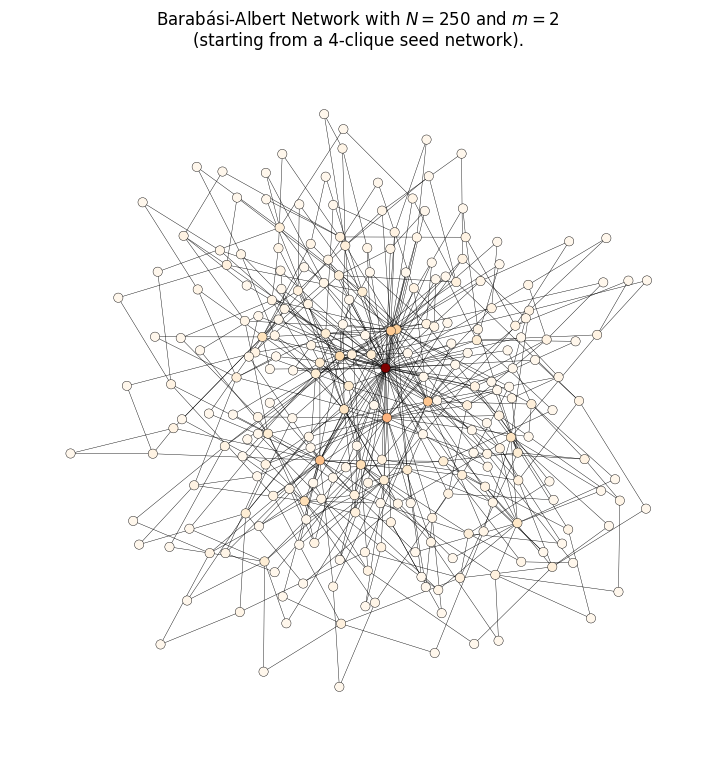

In [ ]:
fig_vis, ax_vis = plt.subplots(figsize=(9, 9))

nodes = G.nodes()
degrees_dict = nx.degree(G)
degrees = [degrees_dict[node] for node in nodes]

nx.draw(
    G, ax=ax_vis, node_size=45, node_color=degrees, cmap='OrRd',
    vmin=np.min(degrees), vmax=np.max(degrees), width=0.3, linewidths=0.3, edgecolors='black')

plt.title("Barabási-Albert Network with $N=250$ and $m=2$ \n(starting from a 4-clique seed network).")

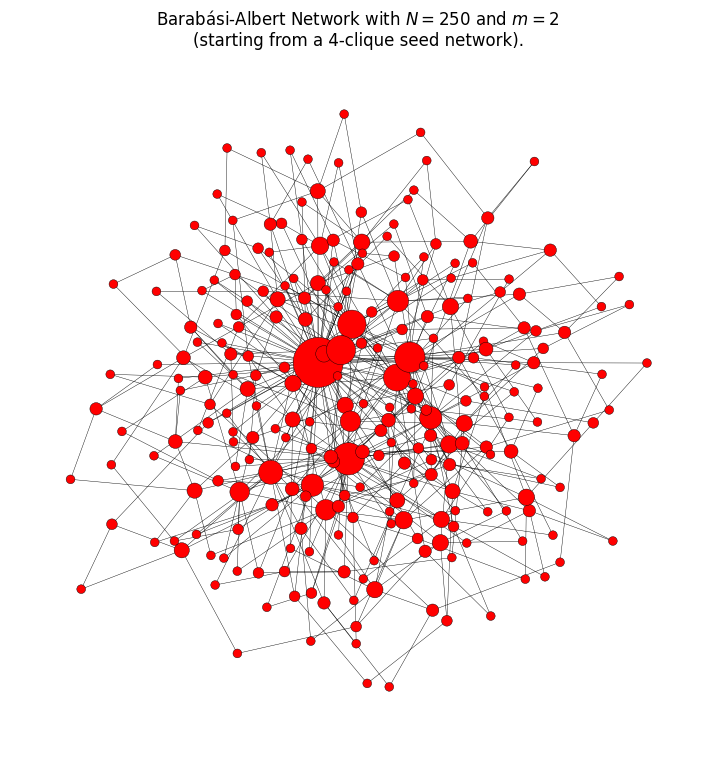

In [ ]:
# Get the degrees of all nodes
degrees = dict(G.degree())

# Create a list of node sizes based on their degrees
node_sizes = [20 * degrees[node] for node in G.nodes()]

# Visualize the network using spring layout with variable node sizes
fig_vis, ax_vis = plt.subplots(figsize=(9, 9))
nodes = G.nodes()

nx.draw(
    G, ax=ax_vis, node_size=node_sizes, node_color='red', cmap='OrRd',
    vmin=np.min(node_sizes), vmax=np.max(node_sizes), width=0.3, linewidths=0.3, edgecolors='black')

plt.title("Barabási-Albert Network with $N=250$ and $m=2$ \n(starting from a 4-clique seed network).")
plt.show()



### **b) BA network degree probability distribution                      Generate a new network using parameters $N=10^4$ with $m=3$ and plot the logarithmically binned probability density function for degree, $P(k)$ on double logarithmic axes. Compare your result with the theoretical prediction of $$P(k)=2m\left(m+1\right)/\left[k\left(k+1\right)\left(k+2\right)\right].$$ To do this, plot both the experimental and theoretical distributions on the same axes.**

In [ ]:
def theory(k, m):
    return 2*m*(m+1)/(k*(k+1)*(k+2))

In [ ]:
# Generate a BA network with N=10^4, m=3, and a 4-clique seed network
N = 10**4
m = 3
seed_net_size = 4
G = ba_network_optimized(N, m, seed_net_size, rng)

In [ ]:
def ba_network_optimized(N, m, seed_net_size, random_seed=None):
    if random_seed is not None:
        rng = np.random.default_rng(random_seed)

    # Initialize the network with a 4-clique seed network
    G = {}
    for i in range(seed_net_size):
        neighbors = list(range(seed_net_size))
        neighbors.remove(i)
        G[i] = set(neighbors)

    # Create a list to store the degrees of nodes
    degrees = [seed_net_size] * seed_net_size

    # Initialize the list of nodes based on their degrees
    node_list = list(range(seed_net_size))

    # Grow the network by adding nodes one by one until it reaches size N
    for new_node in range(seed_net_size, N):
        # Calculate the sum of degrees for normalization
        total_degree = sum(degrees)

        # Select m existing nodes as neighbors for the new node
        selected_neighbors = rng.choice(node_list, size=m, replace=False, p=np.array(degrees) / total_degree)

        # Add edges from the new node to the selected neighbors
        G[new_node] = set(selected_neighbors)
        for neighbor in selected_neighbors:
            G[neighbor].add(new_node)

        # Update degrees and node list
        degrees.extend([0] * m)
        node_list.extend([new_node] * m)

        # Update degrees of selected neighbors and the new node
        degrees[new_node] = m
        for neighbor in selected_neighbors:
            degrees[neighbor] += 1

    return G, degrees  # Return both the network and the degree sequence

# Random seed for reproducibility
random_seed = 42

# Generate a BA network with N=10^4, m=3, and a 4-clique seed network
N = 10**4
m = 3
seed_net_size = 4
G, degree_sequence = ba_network_optimized(N, m, seed_net_size, random_seed)

# Get the degrees of all nodes directly from the degree sequence
degrees = degree_sequence

<ipython-input-26-67af53a5986b>:2: RuntimeWarning: divide by zero encountered in divide
  return 2*m*(m+1)/(k*(k+1)*(k+2))


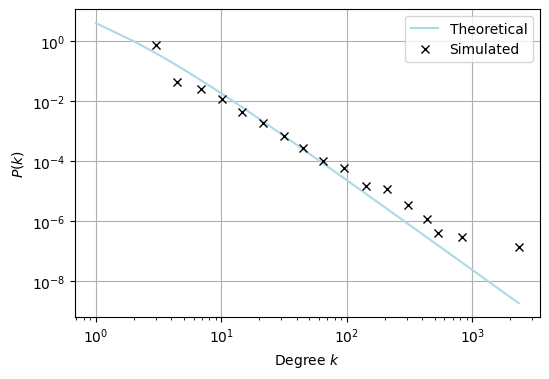

In [ ]:
# Bin the degrees logarithmically and compute the distribution
bins = linlog_bins(degrees, numbins=20)
pk, bin_edges = np.histogram(degrees, bins=bins, density=True)
# Get the bin centers using scipy.stats.binned_statistic
bincenters, _, _ = scipy.stats.binned_statistic(degrees, degrees, statistic='mean', bins=bins)

# Get the theoretical prediction
k_theory = np.arange(np.min(degrees), np.max(degrees))
pk_theory = theory(k_theory, m=3)

# Plot the results
fig_dist, ax_dist = plt.subplots(figsize=(6, 4))
ax_dist.plot(k_theory, pk_theory, color='lightblue', label='Theoretical')
ax_dist.plot(bincenters, pk, 'x', color='black', label='Simulated')
ax_dist.set_xlabel('Degree $k$')
ax_dist.set_ylabel('$P(k)$')
ax_dist.set_xscale('log')
ax_dist.set_yscale('log')
ax_dist.legend()
ax_dist.grid()

## **2. Friendship Paradox**
**The friendship paradox states that the average number of friends that your friends have is, in
general, greater than the average number of friends that you have. In other words, your friends
are likely to be more popular than you are—and this is true even if you have more friends than
average. This counterintuitive result arises from the mathematical nature of networks. In this
exercise, we will investigate the friendship paradox for simple network models.**

**a) First, let us consider a small network whose data is given by `moreno_highschool.edg`. The network represents the friendship between students in a small high school in Illinois, US in 1957-1958.**

- Calculate the fraction of nodes in the network that have a higher average neighbor degree than their own degree.
- Plot for each node the number of neighbors it has (i.e, the degree of the node) and the average number of neighbors that its neighbors have (i.e., the average degree of the neighbors). For convenience, we will relabel the nodes so that higher degree nodes have smaller index labels.
- What do you observe? Does the friendship paradox hold in this network? Explain your answer.

In [ ]:
from google.colab import drive

# This will authorize Colab to access Google Drive.
drive.mount('/content/drive')

Mounted at /content/drive


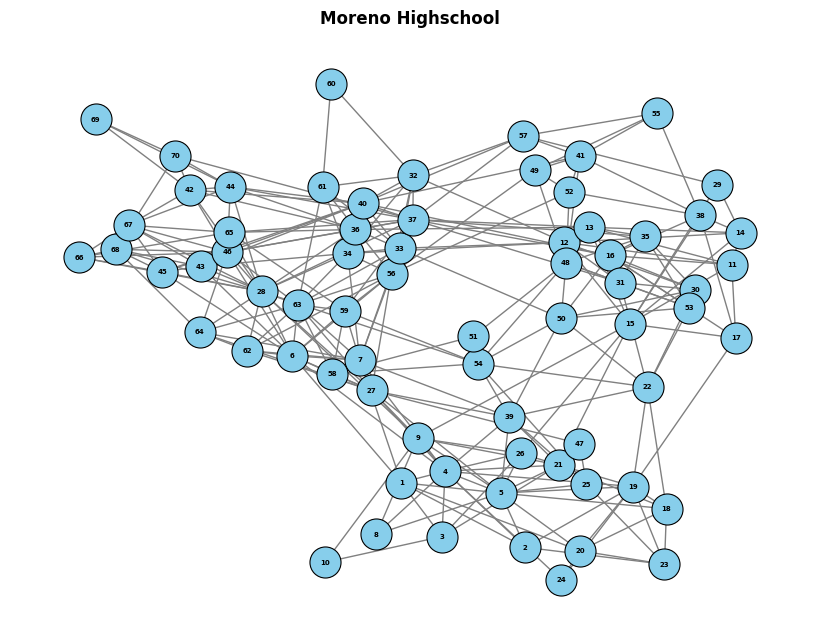

In [ ]:
# Define the path to network file
file_path = "/content/drive/MyDrive/Complex Networks /moreno_highschool.edg"
highschool_net = nx.read_weighted_edgelist(file_path)

plt.figure(figsize=(8, 6))

nx.draw(highschool_net,
        with_labels=True,
        font_size=5,
        node_color='skyblue',edgecolors='black', linewidths=0.8,
        edge_color='gray', width=1,
        font_weight='bold', node_size=500)

plt.title("Moreno Highschool", fontweight="bold")
plt.show()

In [ ]:
def get_average_neighbor_degree(G):
    avg_neighbor_degree = {}
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        neighbor_degrees = [G.degree(neighbor) for neighbor in neighbors]
        if len(neighbor_degrees) > 0:
            avg_degree = sum(neighbor_degrees) / len(neighbor_degrees)
        else:
            avg_degree = 0.0
        avg_neighbor_degree[node] = avg_degree
    return avg_neighbor_degree

# Calculate the average neighbor degrees
avg_neighbor_degree = get_average_neighbor_degree(highschool_net)

In [ ]:
# Sort the nodes by their degree and relabel them
sorted_nodes = sorted(highschool_net.nodes(), key=lambda x: highschool_net.degree(x), reverse=True)
mapping = {original_label: new_label for new_label, original_label in enumerate(sorted_nodes)}
highschool_net = nx.relabel_nodes(highschool_net, mapping)

Text(0.5, 1.0, 'Moreno Highschool')

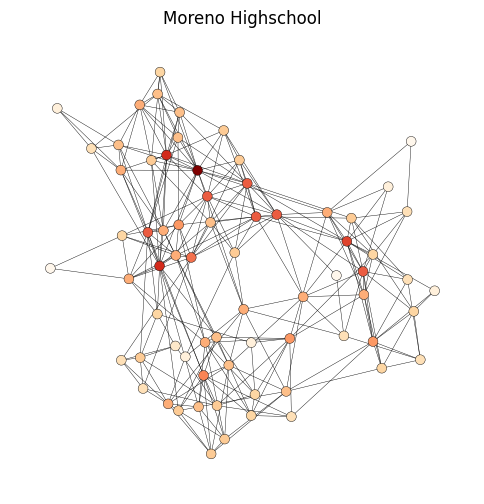

In [ ]:
degrees = [highschool_net.degree[node] for node in highschool_net]
fig_vis, ax_vis = plt.subplots(figsize=(6, 6))
nx.draw(highschool_net, ax=ax_vis, node_size=50, linewidths=0.3,
        node_color=degrees, cmap='OrRd', vmin=min(degrees), vmax=max(degrees),
        width=0.3, edgecolors='black')
plt.title("Moreno Highschool")

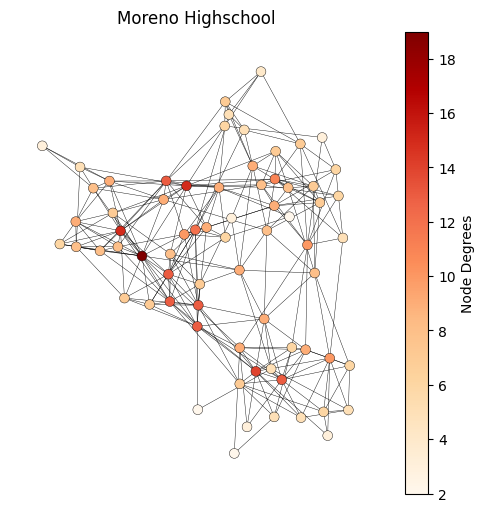

In [ ]:
fig_vis, ax_vis = plt.subplots(figsize=(6, 6))

# Draw the network with node colors based on degrees
node_color = degrees  # Node color based on degrees
cmap = plt.get_cmap('OrRd')  # Colormap

# Draw the network
nx.draw(highschool_net, ax=ax_vis, node_size=50, linewidths=0.3,
        node_color=node_color, cmap=cmap, vmin=min(node_color), vmax=max(node_color),
        width=0.3, edgecolors='black')

# Add a color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array([])  # Empty array required for color bar
cbar = plt.colorbar(sm, ax=ax_vis)
cbar.set_label('Node Degrees')  # Label for the color bar

plt.title("Moreno Highschool")

plt.show()

In [ ]:
def get_fraction_friendship_paradox(network):
    '''
    Calculate the fraction of nodes in the network that have a higher average
    neighbor degree than their own degree.

    Args:
        network (nx.Graph): a networkx graph

    Returns:
        fraction (float): the fraction of nodes in the network that have a higher
            average neighbor degree than their own degree

    Examples:
        >>> G = nx.Graph()
        >>> G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6)])
        >>> fraction = get_fraction_friendship_paradox(G)
        >>> print(fraction)
        0.6666666666666666
    '''
    fraction = 0.0
    for node in network.nodes():
        node_degree = network.degree(node)
        neighbors = list(network.neighbors(node))
        neighbor_degrees = [network.degree(neighbor) for neighbor in neighbors]
        if len(neighbor_degrees) > 0:
            avg_neighbor_degree = sum(neighbor_degrees) / len(neighbor_degrees)
            if avg_neighbor_degree > node_degree:
                fraction += 1
    fraction /= len(network.nodes())
    return fraction

In [ ]:
print('Fraction of nodes with average neighbor degree higher than their own degree: ',
      round(get_fraction_friendship_paradox(highschool_net),2)*100, "%")

Fraction of nodes with average neighbor degree higher than their own degree:  71.0 %


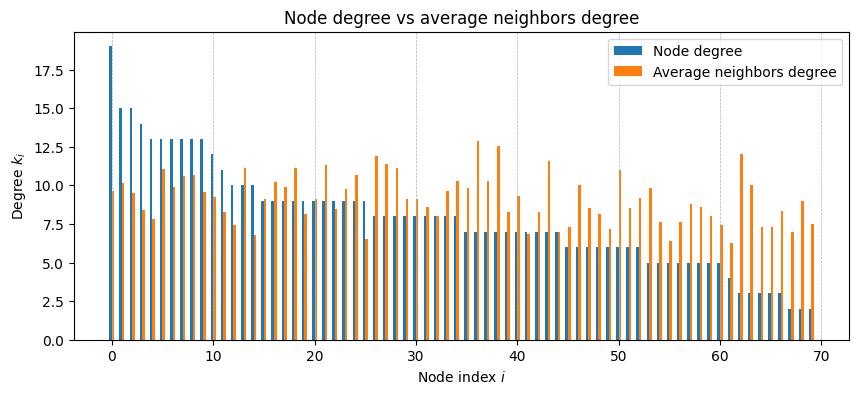

In [ ]:
# node_degrees is a dictionary with nodes as keys and their degrees as values
nodes = sorted(highschool_net.nodes())
node_degrees = [highschool_net.degree(node) for node in nodes]

# avg_nbr_degrees is a dictionary with nodes as keys and their average neighbor degrees as values
avg_nbr_degrees_dict = get_average_neighbor_degree(highschool_net)
avg_nbr_degrees = [avg_nbr_degrees_dict[node] for node in nodes]

fig_bar, ax_bar = plt.subplots(figsize=(10, 4))
width = 0.25
offset = 0.5 * width
ax_bar.bar([nodeid - offset for nodeid in nodes], node_degrees, width=width, label='Node degree')
ax_bar.bar([nodeid + offset for nodeid in nodes], avg_nbr_degrees, width=width, label='Average neighbors degree')
ax_bar.set_xlabel('Node index $i$')
ax_bar.set_ylabel('Degree $k_i$')
ax_bar.legend()
plt.title("Node degree vs average neighbors degree")
plt.grid(axis='x', which='both', linestyle='--', linewidth=0.5)


**b) Now let us check the friendship paradox for larger networks. For that, we consider an Erdős-Rényi random graph and a Barabási-Albert scale-free network. For each of these network models, generate a network with $N=10000$ nodes. For each network:**

**- Calculate the fraction of nodes in the network that have a higher average neighbor degree than their own degree.**

**- Plot the degree distribution and the distribution of the average degree of the neighbors in one plot.**

In [ ]:
def compare_distributions(G):
    '''
    Calculate the friendship paradox for the given graph.

    Args:
        G (nx.Graph): a networkx graph

    Returns:
        bins (np.ndarray): bin edges
        node_degree_dist (np.ndarray): probability of node degrees
        avg_nbr_degree_dist (np.ndarray): probability of average neighbor degrees

    Examples:
        >>> G = nx.Graph()
        >>> G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6)])
        >>> bins, node_degree_density, avg_nbr_degree_density = compare_distributions(G)
        >>> print(bins)
        [1 2 3 4]
        >>> print(node_degree_dist)
        [0.16666667 0.5        0.33333333]
        >>> print(avg_nbr_degree_dist)
        [0.         0.33333333 0.66666667]
    '''
    # Calculate node degrees
    node_degrees = dict(G.degree())

    # Calculate the average neighbor degree for each node
    avg_neighbor_degrees = {}
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        neighbor_degrees = [node_degrees[neighbor] for neighbor in neighbors]
        if len(neighbor_degrees) > 0:
            avg_degree = sum(neighbor_degrees) / len(neighbor_degrees)
        else:
            avg_degree = 0.0
        avg_neighbor_degrees[node] = avg_degree

    # Calculate the maximum degree in the network
    max_degree = max(node_degrees.values())

    # Create bins for degree distribution
    bins = np.arange(max_degree + 2) - 0.5

    # Calculate node degree distribution
    node_degree_hist, _ = np.histogram(list(node_degrees.values()), bins=bins, density=True)
    node_degree_dist = node_degree_hist / node_degree_hist.sum()

    # Calculate average neighbor degree distribution
    avg_neighbor_degree_hist, _ = np.histogram(list(avg_neighbor_degrees.values()), bins=bins, density=True)
    avg_nbr_degree_dist = avg_neighbor_degree_hist / avg_neighbor_degree_hist.sum()

    return bins, node_degree_dist, avg_nbr_degree_dist

In [ ]:
def plot_two_distributions(G, ax, xlog, ylog):
    '''
    Plot the degree distribution and the average neighbor degree distribution
    of the given graph.

    Args:
        G (nx.Graph): a networkx graph
        ax (matplotlib.axes._subplots.AxesSubplot): a matplotlib axes object
        xlog (bool): if True, use logarithmic scale for the x-axis
        ylog (bool): if True, use logarithmic scale for the y-axis

    Returns:
        None

    Examples:
        >>> G = nx.Graph()
        >>> G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6)])
        >>> fig, ax = plt.subplots()
        >>> plot_two_distributions(G, ax, xlog=False, ylog=False)
    '''
    bins, node_degree_dist, avg_nbr_degree_dist = compare_distributions(G)
    ax.plot(bins[:-1], node_degree_dist, label='Node degree', lw=2)
    ax.plot(bins[:-1], avg_nbr_degree_dist, label='Average neighbor degree', lw=2)
    ax.set_xlabel('Degree $k$')
    ax.set_ylabel('$P(k)$')
    ax.legend()
    if xlog:
        ax.set_xscale('log')
    if ylog:
        ax.set_yscale('log')


Fraction of nodes with average neighbor degree higher than their own degree:  62.4 %


Text(0.5, 1.0, 'Node degree vs average neighbors degree - ER model')

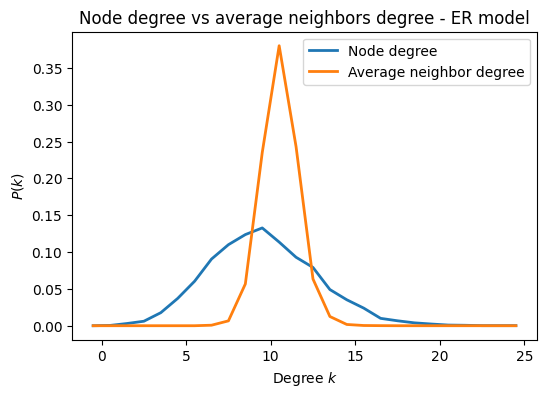

In [ ]:
N = 10000
p = 0.001
ERG = nx.fast_gnp_random_graph(N, p, seed=rng)
print('Fraction of nodes with average neighbor degree higher than their own degree: ',
      round(get_fraction_friendship_paradox(ERG),3)*100, "%")

In [ ]:
def plot_two_distributions_with_mean(G, ax, xlog, ylog):
    '''
    Plot the degree distribution and the average neighbor degree distribution
    of the given graph, including mean values.

    Args:
        G (nx.Graph): a networkx graph
        ax (matplotlib.axes._subplots.AxesSubplot): a matplotlib axes object
        xlog (bool): if True, use logarithmic scale for the x-axis
        ylog (bool): if True, use logarithmic scale for the y-axis

    Returns:
        None
    '''
    bins, node_degree_dist, avg_nbr_degree_dist = compare_distributions(G)

    # Calculate the mean values
    mean_node_degree = sum([x * y for x, y in zip(bins[:-1], node_degree_dist)])
    mean_avg_nbr_degree = sum([x * y for x, y in zip(bins[:-1], avg_nbr_degree_dist)])

    ax.plot(bins[:-1], node_degree_dist, lw=2)
    ax.scatter(bins[:-1], node_degree_dist, label='Node degree', edgecolor ="black")
    ax.plot(bins[:-1], avg_nbr_degree_dist, lw=2)
    ax.scatter(bins[:-1], avg_nbr_degree_dist, label='Average neighbors degree', edgecolor ="black")


    # Add horizontal lines for mean values
    ax.axvline(mean_node_degree, color='r', linestyle='-', label='Mean node Degree')
    ax.axvline(mean_avg_nbr_degree, color='b', linestyle='-', label='Mean avg neighbors degree')

    ax.set_xlabel('Degree $k$')
    ax.set_ylabel('$P(k)$')
  # Create a 2x2 legend outside the plot in the lower part
    legend = ax.legend(loc='upper center', bbox_to_anchor=(0.45, -0.2), ncol=2)

    # Set the legend title
    #legend.set_title('Legend')

    if xlog:
        ax.set_xscale('log')
    if ylog:
        ax.set_yscale('log')


Text(0.5, 1.0, 'Node degree vs average neighbors degree - ER model')

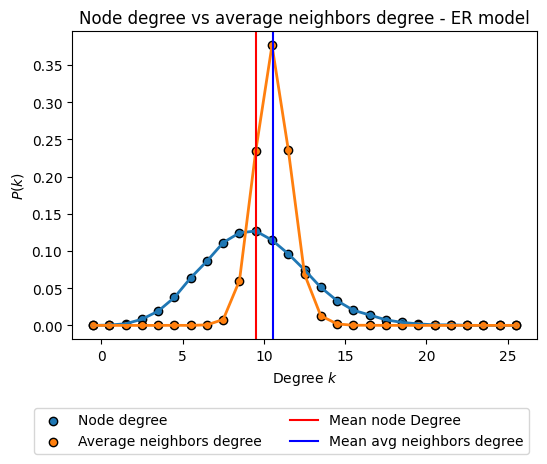

In [ ]:
fig_ER, ax_ER = plt.subplots(figsize=(6, 4))
plot_two_distributions_with_mean(ERG, ax=ax_ER, xlog=False, ylog=False)
plt.title("Node degree vs average neighbors degree - ER model")

Fraction of nodes with average neighbor degree higher than their own degree:  88.8 %


Text(0.5, 1.0, 'Node degree vs average neighbors degree - BA model')

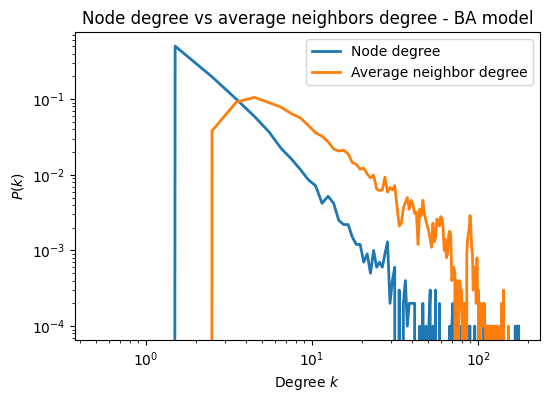

In [ ]:
N = 10000
m = 2
BAG = nx.barabasi_albert_graph(N, m, seed=rng)
print('Fraction of nodes with average neighbor degree higher than their own degree: ',
      round(get_fraction_friendship_paradox(BAG),3)*100, "%")

fig_BA, ax_BA = plt.subplots(figsize=(6, 4))
plot_two_distributions(BAG, ax=ax_BA, xlog=True, ylog=True)
plt.title("Node degree vs average neighbors degree - BA model")

Text(0.5, 1.0, 'Node degree vs average neighbors degree - BA model')

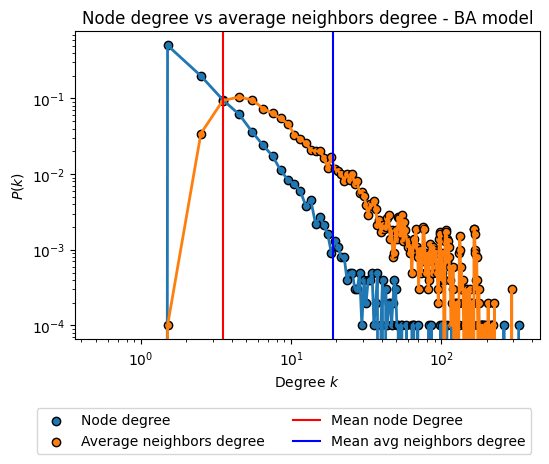

In [ ]:
fig_BA, ax_BA = plt.subplots(figsize=(6, 4))
plot_two_distributions_with_mean(BAG, ax=ax_BA, xlog=True, ylog=True)
plt.title("Node degree vs average neighbors degree - BA model")

## **3. Implementing random walk based network model**
#### **The results of the previous section suggest that the friendship paradox is a general property of random networks. Can we leverage this property to design a growing network model that generates scale-free networks? Here, we implement the random-walk based growing network model. This model is based on the following idea:**

1. Add a new node to the network and randomly select $m$ target nodes.
2. For each target node, select a random neighbor and move the target to that neighbor.
3. Create a link between the new node and each of the $m$ target nodes after repeating step 2 for $t$ steps.
4. Repeat steps 1-3 until the network reaches the desired size $N$.

In this exercise, we implement this model and compare its properties to the Barabàsi-Albert model

#### **a) Generate a network with $N = 10^4$, $m=3$, and $t=8$, and plot the degree distribution**

In [3]:
def rw_based_growing_network(N, m, t, seed_net_size, rng):
    '''
    Generate a growing network using the random walk based model.
    N: the final number of nodes in the network
    m: the number of edges to be added at each time step
    t: the length of the random walk
    seed_net_size: the size of the seed network
    rng: a numpy random number generator
    '''
    # Generate the seed network (a clique of size seed_net_size)
    G = nx.complete_graph(seed_net_size)

    # Grow the network by adding nodes one by one until it reaches size N
    while len(G.nodes()) < N:
        # The index of the new node to be added
        new_node = max(G.nodes()) + 1
        nodes = list(G.nodes())
        G.add_node(new_node)

        # Choose m target nodes randomly from the existing nodes.
        target_nodes = rng.choice(nodes, m, replace=True)

        for target_node in target_nodes:
            current_node = target_node
            for i in range(t - 1):  # Random walk for t-1 steps
                next_node = rng.choice(list(G.neighbors(current_node)))
                current_node = next_node

            while True:  # Continue the walk until valid edge is found
                next_node = rng.choice(list(G.neighbors(current_node)))

                # Check if the random walk reaches the new node itself or a node already connected
                if next_node == new_node or G.has_edge(new_node, next_node):
                    # Restart the random walk from the target node
                    current_node = target_node
                else:
                    # Add an edge between the new node and the node reached by the random walk
                    G.add_edge(new_node, next_node)
                    break  # Exit the inner loop when a valid edge is added

    return G

In [4]:
N = 10000
m = 3
t = 8
seed_net_size = 4
rng = np.random.default_rng(seed=238842)

G_rw = rw_based_growing_network(N, m, t, seed_net_size, rng)

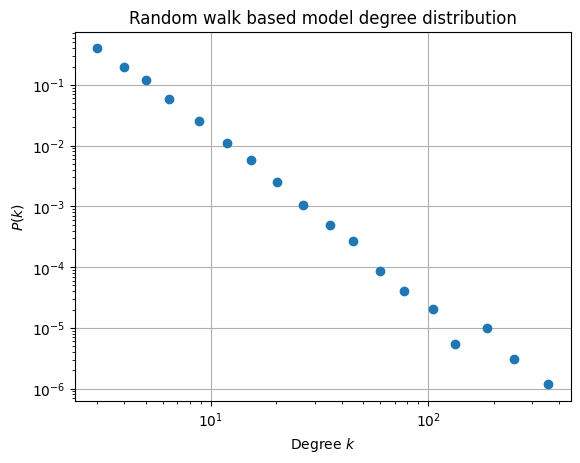

In [27]:
# Plot the degree distribution on a log-log scale
degrees = [degree for _, degree in G_rw.degree()]
bins = linlog_bins(degrees, numbins=20)
pk, bin_edges = np.histogram(degrees, bins=bins, density=True)
bincenters, _, _ = scipy.stats.binned_statistic(degrees, degrees, statistic='mean', bins=bins)

fig, ax = plt.subplots()
ax.plot(bincenters, pk, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Degree $k$')
ax.set_ylabel('$P(k)$')
ax.set_title("Random walk based model degree distribution")
ax.grid()

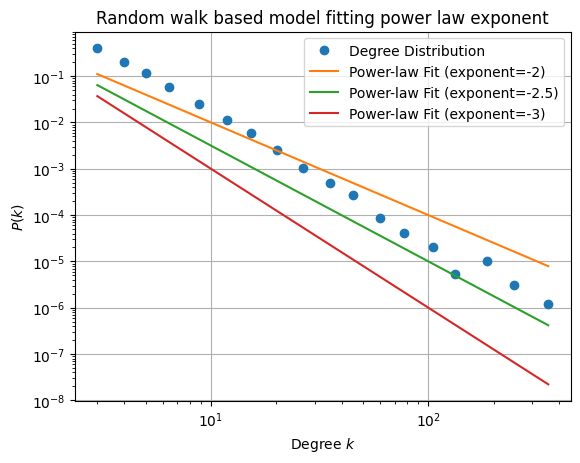

In [16]:
#Compare the power law plots

bins = linlog_bins(degrees, numbins=20)
pk, bin_edges = np.histogram(degrees, bins=bins, density=True)
bincenters, _, _ = scipy.stats.binned_statistic(degrees, degrees, statistic='mean', bins=bins)

fig, ax = plt.subplots()
ax.plot(bincenters, pk, 'o', label='Degree Distribution')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Degree $k$')
ax.set_ylabel('$P(k)$')

# Plot power-law distributions
xmin = min(degrees)
xmax = max(degrees)

# Exponents for the power-law distributions
exponents = [-2, -2.5, -3]

for exponent in exponents:
    x = np.linspace(xmin, xmax, 1000)
    y = x ** exponent
    ax.plot(x, y, label=f'Power-law Fit (exponent={exponent})')

plt.title("Random walk based model fitting power law exponent")
ax.grid()
ax.legend()
plt.show()


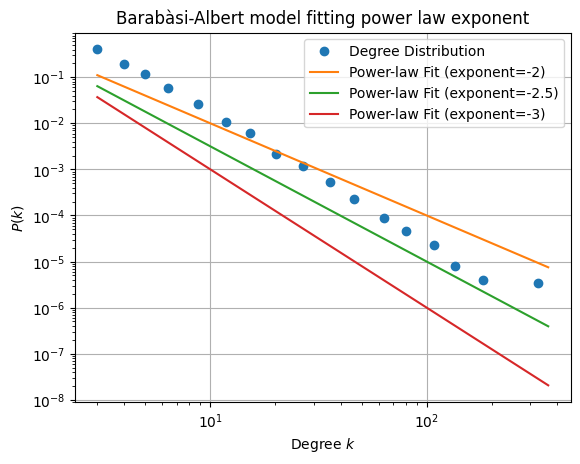

In [19]:
G_ba = nx.barabasi_albert_graph(N, m, seed=rng)
degrees = [degree for _, degree in G_ba.degree()]
bins = linlog_bins(degrees, numbins=20)
pk, bin_edges = np.histogram(degrees, bins=bins, density=True)
bincenters, _, _ = scipy.stats.binned_statistic(degrees, degrees, statistic='mean', bins=bins)

fig, ax = plt.subplots()
ax.plot(bincenters, pk, 'o', label='Degree Distribution')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Degree $k$')
ax.set_ylabel('$P(k)$')

# Plot power-law distributions
xmin = min(degrees)
xmax = max(degrees)

# Exponents for the power-law distributions
exponents = [-2, -2.5, -3]

for exponent in exponents:
    x = np.linspace(xmin, xmax, 1000)
    y = x ** exponent
    ax.plot(x, y, label=f'Power-law Fit (exponent={exponent})')

plt.title("Barabàsi-Albert model fitting power law exponent")
ax.grid()
ax.legend()
plt.show()


In [25]:
# Parameters for both network models
N = 10000
m_rw = 3
t_rw = 8
seed_net_size = 4
# Generate random walk-based network
G_rw = rw_based_growing_network(N, m=m_rw, t=t_rw, seed_net_size=seed_net_size, rng=np.random.default_rng(238842))

# Generate BA network
G_ba = nx.barabasi_albert_graph(N, m, seed=rng)

# Calculate degree distributions for both networks
degree_sequence_rw = [degree for _, degree in G_rw.degree()]
degree_sequence_ba = [degree for _, degree in G_ba.degree()]

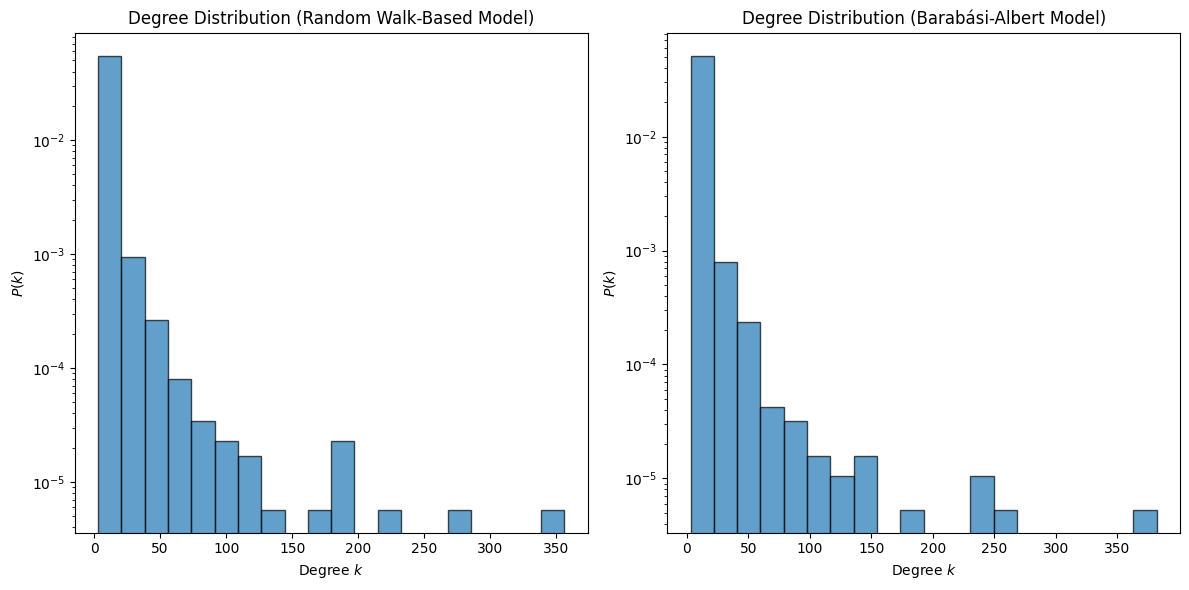

In [26]:
# Plot degree distributions side by side
plt.figure(figsize=(12, 6))

# Random walk-based network
plt.subplot(1, 2, 1)
plt.hist(degree_sequence_rw, bins=20, density=True, alpha=0.7, log=True, edgecolor='black')
plt.xlabel('Degree $k$')
plt.ylabel('$P(k)$')
plt.title('Degree Distribution (Random Walk-Based Model)')
plt.xticks(np.arange(0, max(degree_sequence_rw) + 1, 50))

# Barabási-Albert network
plt.subplot(1, 2, 2)
plt.hist(degree_sequence_ba, bins=20, density=True, alpha=0.7, log=True, edgecolor='black')
plt.xlabel('Degree $k$')
plt.ylabel('$P(k)$')
plt.title('Degree Distribution (Barabási-Albert Model)')
plt.xticks(np.arange(0, max(degree_sequence_ba) + 1, 50))

plt.tight_layout()
plt.show()